In [56]:
from transfer import ObjectStyleTransfer

In [57]:
trans = ObjectStyleTransfer('fcn8s_pascal_best_model.pkl')

Sequential(
  (0): Conv2d (3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (2): ReLU(inplace)
  (3): Conv2d (64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (5): ReLU(inplace)
  (6): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (7): Conv2d (64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True)
  (9): ReLU(inplace)
  (10): Conv2d (128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True)
  (12): ReLU(inplace)
  (13): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (14): Conv2d (128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True)
  (16): ReLU(inplace)
  (17): Conv2d (256, 256, kernel_size=(3, 3), stride=(1,

In [62]:
%%time
img = trans.generate(
    content_img='output/content.jpg',
    style_img=['output/style.jpg'],
    size=(256, 256)
)

Read Input Image from : output/content.jpg


/home/konstagapov/object-to-object-style-transfer/env/lib/python3.5/site-packages/torch/nn/functional.py:1423: UserWarning: nn.functional.upsample_bilinear is deprecated. Use nn.functional.upsample instead.
  warnings.warn("nn.functional.upsample_bilinear is deprecated. Use nn.functional.upsample instead.")


Read Input Image from : output/style.jpg
(64, 64)
Iteration: 0 Loss: 9978.6240234375
Content Loss: 2.8351429849863052
Style Loss 3_1: 51.96700692176819
Style Loss 4_1: 20.978686213493347
Background Loss: 9902.84252166748
Iteration: 200 Loss: 72.44805908203125
Content Loss: 0.1323562115430832
Style Loss 3_1: 51.35546326637268
Style Loss 4_1: 20.910848677158356
Background Loss: 0.049390964704798535
(128, 128)
Iteration: 0 Loss: 10625.00390625
Content Loss: 3.4792907536029816
Style Loss 3_1: 58.032411336898804
Style Loss 4_1: 27.90094017982483
Background Loss: 10535.591125488281
Iteration: 200 Loss: 85.44581604003906
Content Loss: 0.09872773662209511
Style Loss 3_1: 57.52597451210022
Style Loss 4_1: 27.76513695716858
Background Loss: 0.0559731743123848
256 256
Iteration: 0 Loss: 11712.99609375
Content Loss: 3.754141554236412
Style Loss 3_1: 59.74346399307251
Style Loss 4_1: 31.13901913166046
Background Loss: 11618.359565734863
Iteration: 200 Loss: 90.21560668945312
Content Loss: 0.1370016

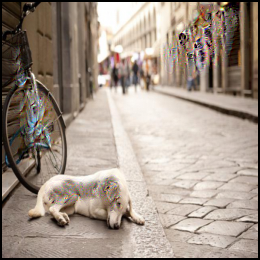

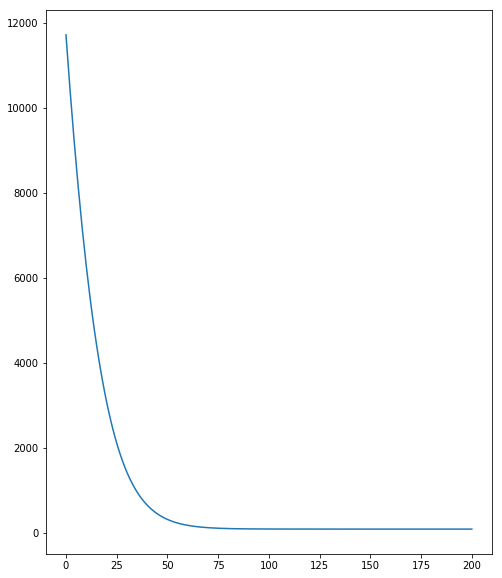

In [63]:
%matplotlib inline
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0, 10.0)

from utils import to_img

losses = trans._style_transfer.debug['loss']
plt.figure(1)
plt.plot(range(len(losses)), losses)
transforms.ToPILImage()(img)

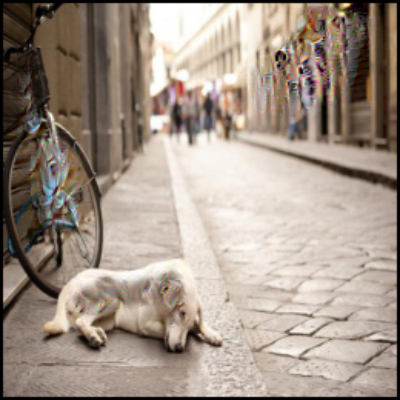

In [64]:
transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((400, 400))
])(img)

In [65]:
import torch
torch.cuda.empty_cache()